In [1]:
# se importan las librerias a utilizar
import spacy
import pandas as pd
import numpy as np
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

import funciones as f

In [2]:
# se carga el modelo NLP en espanol
nlp = spacy.load('es_core_news_md')

In [3]:
# se importa la informacion del archivo de excel
df = pd.read_excel('info.xlsx', sheet_name='Hoja1')

# se establecen las preguntas que se van a usar y una variable para guardar datos
preguntas = ['P1', 'P2', 'P3']
expanded_responses = {}

In [4]:
# se procesa la informacion y se guardan los resultados del analisis del texto
for pregunta in preguntas:
    if pregunta in df.columns:
        ans = df[['Sector', pregunta]].dropna()
    
    ans['res'] = ans[pregunta].apply(lambda x: f.extract_keywords(x, f.dictionary))
    
    expanded_resp = f.expand_ans(ans, 'res').drop('res', axis=1)
    expanded_responses[pregunta] = expanded_resp

In [5]:
resp1 = expanded_responses.get('P1', None)
resp2 = expanded_responses.get('P2', None)
resp3 = expanded_responses.get('P3', None)

In [6]:
p1 = f.results(resp1)
p2 = f.results(resp2)
p3 = f.results(resp3)

In [7]:
totales1 = pd.concat([resp1, p1])
totales2 = pd.concat([resp2, p2])
totales3 = pd.concat([resp3, p3])

Se generan las graficas para cada grupo

In [8]:
#se generan dataframes para cada grupo de acuerdo a la pregunta
p1_1 = p1.drop(['Sector', 'P1'], axis=1)
p2_1 = p2.drop(['Sector', 'P2'], axis=1)
p3_1 = p3.drop(['Sector', 'P3'], axis=1)

In [9]:
#grafica radial general
total = pd.concat([p1_1.iloc[-1], p2_1.iloc[-1], p3_1.iloc[-1]], axis=1).T
suma = pd.DataFrame(total.sum()).T
total = pd.concat([total, suma]).reset_index(drop=True)

In [10]:
#graficas radiales por pregunta
f.graf_rad(p1_1, 'p1.png')
f.graf_rad(p2_1, 'p2.png')
f.graf_rad(p3_1, 'p3.png')
f.graf_rad(total, 'total.png')

c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])
c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.append(values, values[0])
c:\Users\shannon.cap\Documents\GitHub\sistematizacion_test\funciones.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

(<Figure size 600x600 with 1 Axes>, <PolarAxes: >)

<Axes: title={'center': 'Resultados generales'}>

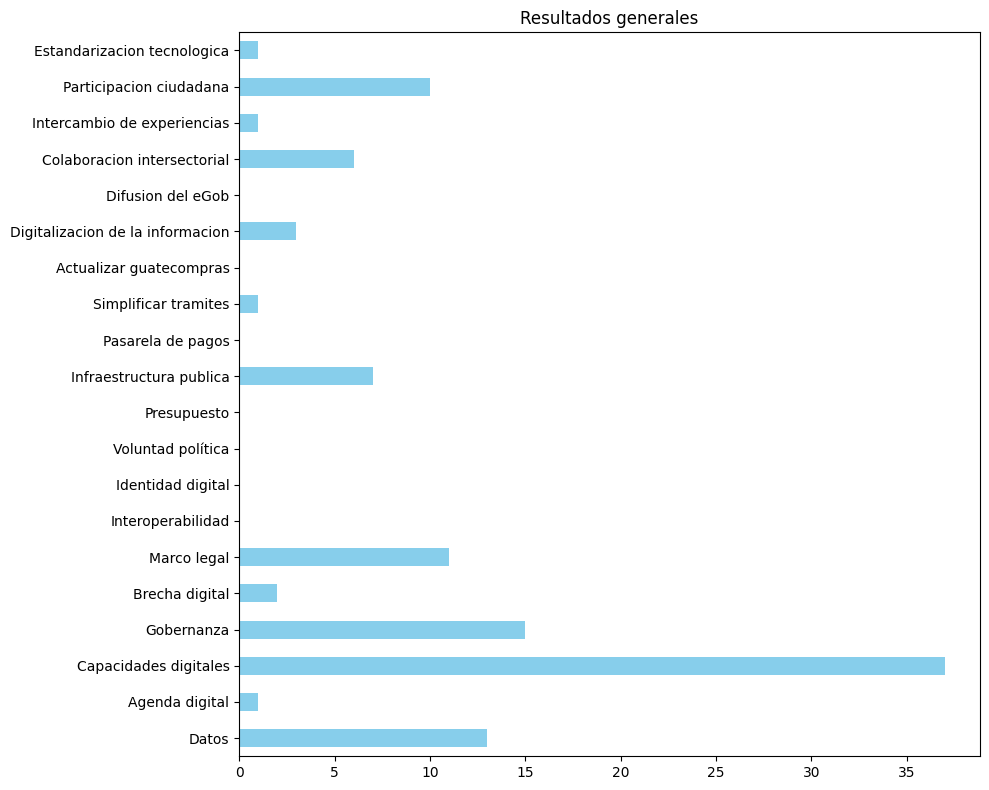

In [11]:
f.histograma(total, 'totalhist.png')

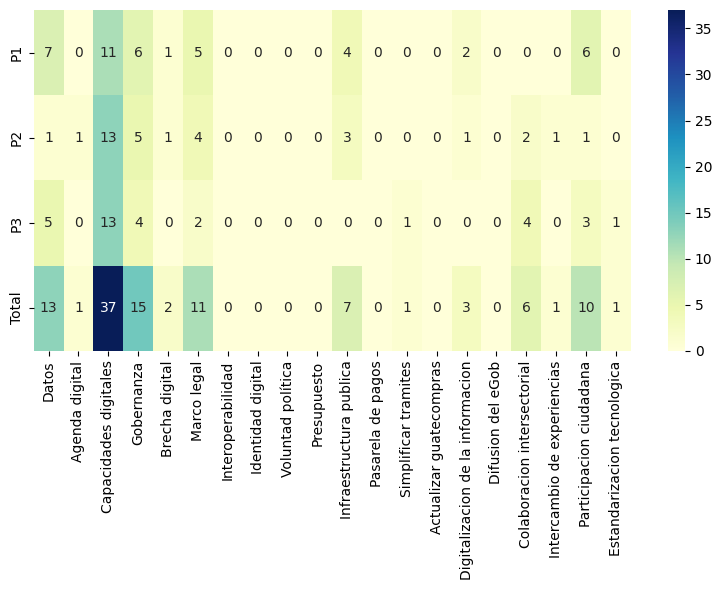

In [12]:
f.heatmap(total, 'totalhm.png')

Se exportan los datos a un archivo de excel

In [13]:
with pd.ExcelWriter('output.xlsx', engine='openpyxl') as writer:
    totales1.to_excel(writer, sheet_name='Sheet1', index=False)
    totales2.to_excel(writer, sheet_name='Sheet2', index=False)
    totales3.to_excel(writer, sheet_name='Sheet3', index=False)
    total.to_excel(writer, sheet_name='Sheet4', index=False)
    
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']
    
    img = Image('p1.png')
    img.anchor = 'X2'
    worksheet.add_image(img)
    
    workbook = writer.book
    worksheet = writer.sheets['Sheet2']
    
    img = Image('p2.png')
    img.anchor = 'X2'
    worksheet.add_image(img)
    
    workbook = writer.book
    worksheet = writer.sheets['Sheet3']
    
    img = Image('p3.png')
    img.anchor = 'X2'
    worksheet.add_image(img)
    
    workbook = writer.book
    worksheet = writer.sheets['Sheet4']
    
    img = Image('total.png')
    img.anchor = 'A8'
    worksheet.add_image(img)
    
    workbook = writer.book
    worksheet = writer.sheets['Sheet4']
    
    img = Image('totalhist.png')
    img.anchor = 'K8'
    worksheet.add_image(img)
    
    workbook = writer.book
    worksheet = writer.sheets['Sheet4']
    
    img = Image('totalhm.png')
    img.anchor = 'W8'
    worksheet.add_image(img)